In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [38]:
# x = df.iloc[:,:-1].values
# y = df.iloc[:,-1].values

In [39]:
# np.random.seed(42)
# data = np.column_stack((x, y.reshape(-1, 1)))
# np.random.shuffle(data)

# test_size = 0.2
# num_test_samples = int(len(data) * test_size)
# train_data, test_data = data[num_test_samples:], data[:num_test_samples]


# x_train, y_train = train_data[:, :-1], train_data[:, -1]
# x_test, y_test = test_data[:, :-1], test_data[:, -1]

# from sklearn.model_selection import train_test_split

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
def split_train_test(df, y_col):
    train_data, test_data = pd.DataFrame(), pd.DataFrame()
    for y in df[y_col].unique():
        df_y = df[df[y_col] == y]
        test_data = pd.concat([test_data, df_y[:10]], ignore_index=True)
        train_data = pd.concat([train_data, df_y[10:]], ignore_index=True)
    x_train, y_train = train_data.drop(y_col, axis=1), train_data[y_col]
    x_test, y_test = test_data.drop(y_col, axis=1), test_data[y_col]
    return x_train, y_train, x_test, y_test

In [40]:
x_train, y_train, x_test, y_test = split_train_test(df,"Customer_Segment")
print(f"X_train: {len(x_train)}")
print(f"X_test: {len(x_test)}")

X_train: 148
X_test: 30


### Feature scaling

In [41]:
# TRAIN SET
mean1 = np.mean(x_train,axis=0)
std1 = np.std(x_train,axis=0)

sc_x_train = (x_train-mean1)/std1

# TEST SET
mean2 = np.mean(x_test,axis=0)
std2 = np.std(x_test,axis=0)

sc_x_test = (x_test-mean2)/std2

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.fit_transform(x_test)


## PRINCIPAL COMPONENT ANALYSIS (PCA)

In [42]:
class PCA:
    def __init__(self, explained_var_threshold=0.95):
        self.explained_var_threshold = explained_var_threshold
        self.principal_components = None
        self.individual_explained_variance = None
        self.explained_var_ratio = None
        self.cumulative_exp_var_ratio = None
        self.optimal_components = None
        
    def fit(self, data):
        # step1 covariance matrix
        covariance_mat = np.cov(data, rowvar=False)
        
        # step2 Eigenvalues and eigenvectors
        eigen_val, eigen_vec = np.linalg.eig(covariance_mat)
        
        # step3 Sort eigenvalues and eigenvectors
        sort_indices = eigen_val.argsort()[::-1]
        eigen_val = eigen_val[sort_indices]
        eigen_vec = eigen_vec[:, sort_indices]
        
        # step4 Explained variance
        self.individual_explained_variance = eigen_val
        self.explained_var_ratio = eigen_val / eigen_val.sum()
        self.cumulative_exp_var_ratio = np.cumsum(self.explained_var_ratio)
        
        # step5 Number of Components
        self.optimal_components = np.argmax(self.cumulative_exp_var_ratio >= self.explained_var_threshold) + 1
        
        # step6 Principal components
        self.principal_components = eigen_vec[:, :self.optimal_components]
        
    def transform(self, data):
    # step7 Transform Data
        transformed_data = np.dot(data, self.principal_components)
        return transformed_data

In [43]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)

In [44]:
x_train_pca.shape,y_train.shape

((148, 1), (148,))

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train_pca,y_train)

LogisticRegression(random_state=42)

In [46]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(x_test_pca)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy(y_test,y_pred)

[[9 0 1]
 [0 7 3]
 [0 8 2]]


0.6

### Training set 

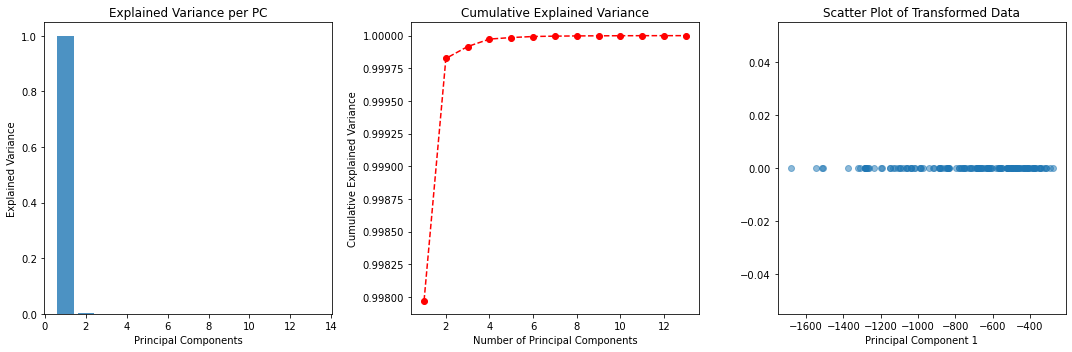

In [47]:
import matplotlib.pyplot as plt
import numpy as np

custom_pca = PCA(explained_var_threshold=0.95)

custom_pca.fit(x_train)

x_train_transformed = custom_pca.transform(x_train)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(custom_pca.explained_var_ratio) + 1), custom_pca.explained_var_ratio, alpha=0.8)
plt.title('Explained Variance per PC')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 3, 2)
plt.plot(range(1, len(custom_pca.cumulative_exp_var_ratio) + 1), custom_pca.cumulative_exp_var_ratio, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.subplot(1, 3, 3)
plt.scatter(x_train_transformed[:, 0], np.zeros_like(x_train_transformed[:, 0]), alpha=0.5)
plt.title('Scatter Plot of Transformed Data')
plt.xlabel('Principal Component 1')

plt.tight_layout()
plt.show()


### Test set

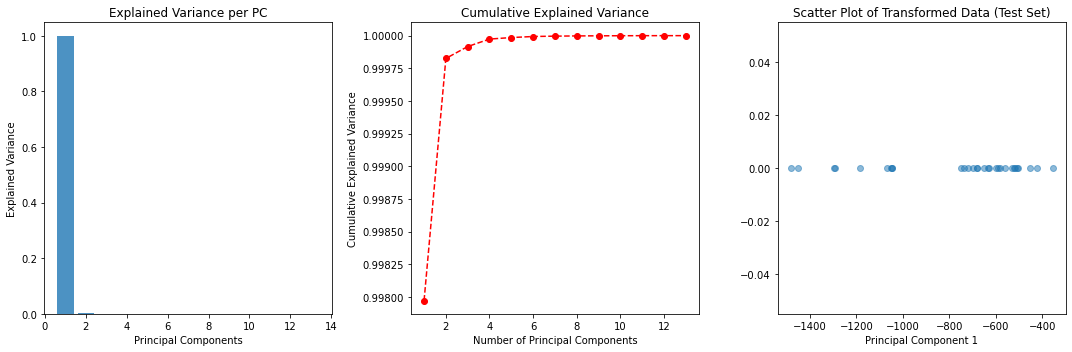

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming x_test is your test dataset

# Transform the test data using the optimal number of components
x_test_transformed = custom_pca.transform(x_test)

# Plot explained variance
plt.figure(figsize=(15, 5))

# Plot explained variance
plt.subplot(1, 3, 1)
plt.bar(range(1, len(custom_pca.explained_var_ratio) + 1), custom_pca.explained_var_ratio, alpha=0.8)
plt.title('Explained Variance per PC')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

# Plot cumulative explained variance
plt.subplot(1, 3, 2)
plt.plot(range(1, len(custom_pca.cumulative_exp_var_ratio) + 1), custom_pca.cumulative_exp_var_ratio, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Scatter plot of transformed data (in 1D)
plt.subplot(1, 3, 3)
plt.scatter(x_test_transformed[:, 0], np.zeros_like(x_test_transformed[:, 0]), alpha=0.5)
plt.title('Scatter Plot of Transformed Data (Test Set)')
plt.xlabel('Principal Component 1')

plt.tight_layout()
plt.show()
